In [2]:
#This is a list of the python module used for the analysis phase

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go

In [3]:
trips_frame = pd.read_csv('C:/Users/Diego/Documents/Citi Bike project/Rents_per_rider_type_and_gender.csv')

trips_frame['group'] = trips_frame['usertype'] + ' : ' + trips_frame['gender']

trips_frame

usertype   gender  Year      Month        Day  total_number_of_trips  \
0       Customer   female  2013       July  Wednesday                      1   
1       Customer   female  2014        May   Saturday                      2   
2       Customer   female  2014       June     Sunday                      2   
3       Customer   female  2014       June     Friday                      1   
4       Customer   female  2014       June   Saturday                      5   
...          ...      ...   ...        ...        ...                    ...   
1158  Subscriber  unknown  2016  September    Tuesday                   2552   
1159  Subscriber  unknown  2016  September  Wednesday                   2699   
1160  Subscriber  unknown  2016  September   Thursday                   3175   
1161  Subscriber  unknown  2016  September     Friday                   2870   
1162  Subscriber  unknown  2016  September   Saturday                   2317   

                     group  
0        Customer : female  
1        Customer : female  
2        Customer : female  
3        Customer : female  
4        Customer : female  
...                    ...  
1158  Subscriber : unknown  
1159  Subscriber : unknown  
1160  Subscriber : unknown  
1161  Subscriber : unknown  
1162  Subscriber : unknown  

[1163 rows x 7 columns]

In [4]:
year_array = np.unique(trips_frame['Year'])

year_array 

array([2013, 2014, 2015, 2016], dtype=int64)

In [5]:
def trip_number(dataframe, column_names, col_value,array_name):
    
    list_name = []
    
    vec = dataframe[column_names[0]] == col_value
    
    data1_1 = dataframe[vec]

    for j in array_name:
        e = 0
        for i in (range(0,data1_1.shape[0])):
            if data1_1[column_names[1]].iloc[i] == j:
                e += data1_1[column_names[2]].iloc[i]
        list_name.append(e)
        
    return(list_name)

trip_number1_1 = trip_number(trips_frame, ['usertype','Year','total_number_of_trips'], 'Customer',year_array)
        
trip_number1_2 = trip_number(trips_frame, ['usertype','Year','total_number_of_trips'], 'Subscriber',year_array)

trip_number1_1

[666940, 793495, 1311331, 1236265]

In [6]:
trip_number1_2

[4370245, 7287721, 8626638, 9026384]

In [7]:
trips_per_year = np.array(trip_number1_1) + np.array(trip_number1_2)

trips_per_year

array([ 5037185,  8081216,  9937969, 10262649], dtype=int64)

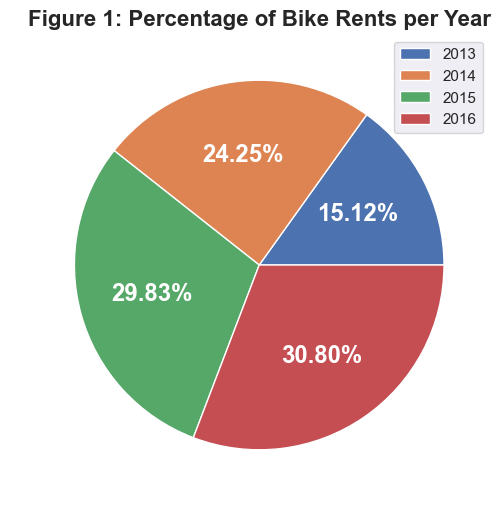

In [78]:
sns.set()

plt.figure(figsize = (8,6))

plt.pie(trips_per_year,
        labels = year_array,
        autopct = '%1.2f%%',
        textprops = {'size':'x-large', 'fontweight':'bold', 'color':'w'})

plt.legend()

plt.title("Figure 1: Percentage of Bike Rents per Year", fontsize = 16, fontweight = 'bold')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure1.png')

Every year, there was more people that rented bikes from Citi bike.

The greatest increase was from 2013 to 2014. A possible reason for this could be that the program started during the later half of 2013.

The lowest increases was from 2015 to 2016. A possible reason for this could be that the data set contains information of the first 3 quarters of 2016.

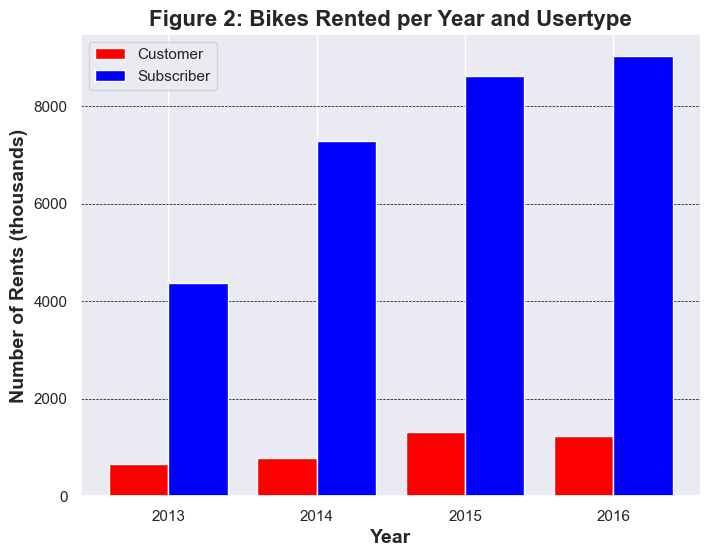

In [9]:
x = np.arange(4)

plt.figure(figsize = (8,6))
  
plt.bar(x-0.20, np.array(trip_number1_1)/1000, width=0.40, color='#ff0000')

plt.bar(x+0.20, np.array(trip_number1_2)/1000, width=0.40, color='#0000ff')

plt.xticks(x, year_array)

plt.xlabel("Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Number of Rents (thousands)", fontsize = 14, fontweight = 'bold')

plt.legend(["Customer","Subscriber"])

plt.title("Figure 2: Bikes Rented per Year and Usertype", fontsize = 16, fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis = 'y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure2.png')

plt.show()

Subscribers used more bikes than customers each year with 2016 being the year that the difference was at greater.

For subscribers, there was an increase in the amount of rents each year while for customers there was not a specified trend of increase nor decrease as time goes.

Approximately, 88% of the leases were done by subscribers.

Subscribers rented more than 4 million bikes each year while customer rented between 0.5 and 1.5 million bikes each year.

In [10]:
trip_number2_1 = trip_number(trips_frame, ['gender','Year','total_number_of_trips'], 'female',year_array)

trip_number2_2 = trip_number(trips_frame, ['gender','Year','total_number_of_trips'], 'male',year_array)

trip_number2_3 = trip_number(trips_frame, ['gender','Year','total_number_of_trips'], 'unknown',year_array)

trip_number2_1

[1034631, 1650274, 2006962, 2186917]

In [11]:
trip_number2_2

[3335391, 5635962, 6608929, 6769032]

In [12]:
trip_number2_3

[667163, 794980, 1322078, 1306700]

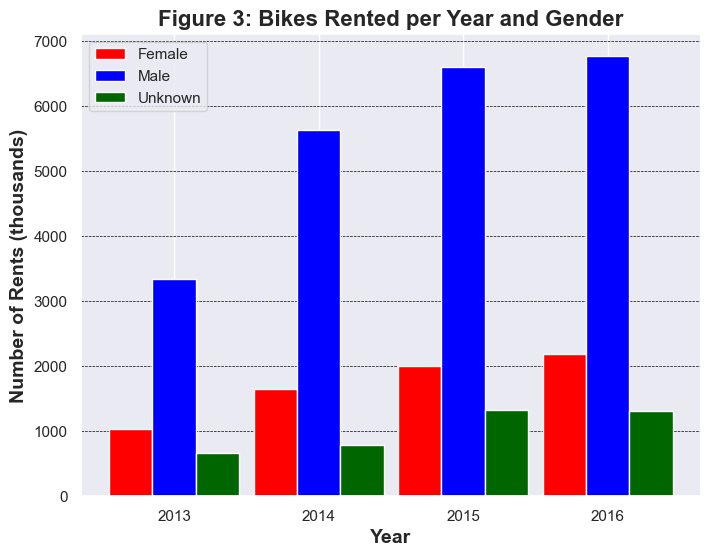

In [13]:
plt.figure(figsize = (8,6))

x = np.arange(4)

plt.bar(x-0.30, np.array(trip_number2_1)/1000, width=0.3, color='#ff0000')

plt.bar(x, np.array(trip_number2_2)/1000, width=0.3, color='#0000ff')

plt.bar(x+0.30, np.array(trip_number2_3)/1000, width=0.3, color='#006600')

plt.xticks(x, year_array)

plt.xlabel("Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Number of Rents (thousands)", fontsize = 14, fontweight = 'bold')

plt.legend(["Female","Male", "Unknown"])

plt.title("Figure 3: Bikes Rented per Year and Gender", fontsize = 16, fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis = 'y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure3.png')

plt.show()

Males were the ones who rented bikes the most.

During each year, the combination of rents of both female riders and the ones who kept their gender private composed less than 50% of the riders.

Each year, the number of rides for each category increased.

In [14]:
gender_array = np.unique(trips_frame['gender'])

gender_array

array(['female', 'male', 'unknown'], dtype=object)

In [15]:
trip_number3_1 = trip_number(trips_frame, ['usertype','gender','total_number_of_trips'], 'Customer',gender_array)

trip_number3_2 = trip_number(trips_frame, ['usertype','gender','total_number_of_trips'], 'Subscriber',gender_array)

trip_number3_1

[13148, 20060, 3974823]

In [16]:
trip_number3_2

[6865636, 22329254, 116098]

In [17]:
total_trips = np.array(trip_number3_2) + np.array(trip_number3_1)

total_trips = total_trips.sum()

total_trips

33319019

In [18]:
customer_trips = np.array(trip_number3_1)

subscriber_trips = np.array(trip_number3_2)

In [19]:
sum(trip_number3_1)/total_trips*100

12.029258724574094

In [20]:
total_trips_frame = pd.DataFrame(np.array([customer_trips,subscriber_trips]).T, columns = ['Customer','Subscriber'])

total_trips_frame

Customer  Subscriber
0     13148     6865636
1     20060    22329254
2   3974823      116098

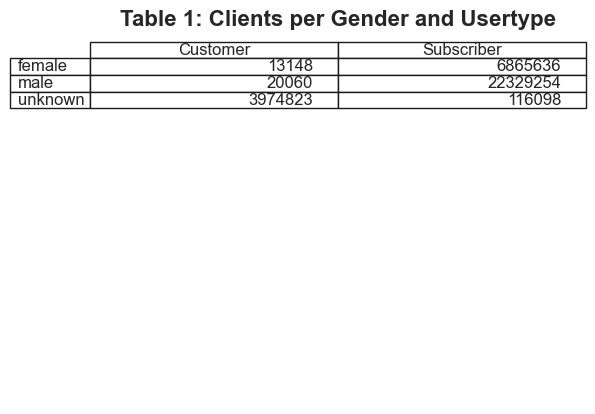

In [21]:
fig, ax = plt.subplots() 

ax.set_axis_off() 

plt.table(cellText = total_trips_frame.values, colLabels = total_trips_frame.columns,
         rowLabels = np.unique(trips_frame['gender']), loc ='upper center').scale(1,1)

ax.axis("off")

plt.title("Table 1: Clients per Gender and Usertype", fontsize = 16, fontweight = 'bold')

plt.show()

In [22]:
fig = go.Figure(data=[go.Table(header=dict(values=['','Customer','Subscriber']),
                 cells=dict(values=[['Female','Male','Unknown'],list(np.array(trip_number3_1)), list(np.array(trip_number3_2))]))])

fig.update_layout(title_text='Table 1: Distrbution of Rents per Group of Clients', title_x=0.5, title_font_family="Arial Black",
    title_font_color="black")

fig.show()

Most of the clients in the Customer group didn't provide their gender when they rented the bikes.

Most of the clients in the Subscriber group were males.

For both groups (mainly for the Subscriber group), men rented more bikes than women.

In [23]:
day_array = np.unique(trips_frame['Day'])[[1,5,6,4,0,2,3]]

day_array

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [24]:
trip_number4_1 = trip_number(trips_frame, ['usertype','Day','total_number_of_trips'], 'Customer',day_array)

trip_number4_2 = trip_number(trips_frame, ['usertype','Day','total_number_of_trips'], 'Subscriber',day_array)

trip_number4_1

[482755, 390106, 396383, 412370, 501287, 936238, 888892]

In [25]:
trip_number4_2

[4354625, 4712138, 4844445, 4736583, 4484118, 3131478, 3047601]

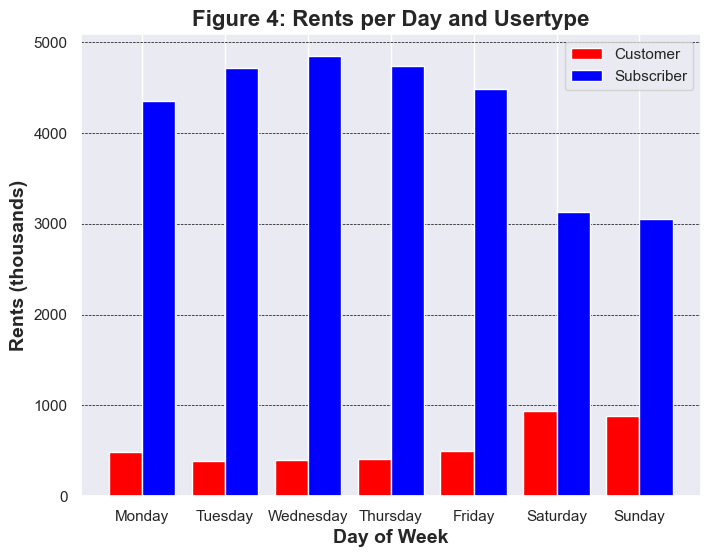

In [26]:
plt.figure(figsize = (8,6))

x = np.arange(7)

plt.bar(x-0.20, np.array(trip_number4_1)/1000, width=0.40, color='#ff0000')

plt.bar(x+0.20, np.array(trip_number4_2)/1000, width=0.40, color='#0000ff')

plt.xticks(x,day_array)

plt.xlabel("Day of Week", fontsize = 14, fontweight = 'bold')

plt.ylabel("Rents (thousands)", fontsize = 14, fontweight = 'bold')

plt.legend(["Customer","Subscriber"])

plt.title("Figure 4: Rents per Day and Usertype", fontsize = 16, fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis = 'y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure4.png')

plt.show()

Subscribers rented bikes mainly from Monday to Friday while the Customers rented bikes mostly on weekends.

The day where bikes were rented mainly by Subscribers and Customers were Wednesdays and Saturdays respectively.

There is an inverse relationship between the number of leases.

In [27]:
Month_Year = trips_frame['Month'] + ' ' + trips_frame['Year'].astype(str)

trips_frame_periods = trips_frame[['usertype','total_number_of_trips']]

trips_frame_periods['Time Period'] = Month_Year

trips_frame_periods

C:\Users\Diego\AppData\Local\Temp\ipykernel_11860\591539360.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



usertype  total_number_of_trips     Time Period
0       Customer                      1       July 2013
1       Customer                      2        May 2014
2       Customer                      2       June 2014
3       Customer                      1       June 2014
4       Customer                      5       June 2014
...          ...                    ...             ...
1158  Subscriber                   2552  September 2016
1159  Subscriber                   2699  September 2016
1160  Subscriber                   3175  September 2016
1161  Subscriber                   2870  September 2016
1162  Subscriber                   2317  September 2016

[1163 rows x 3 columns]

In [28]:
period_array = np.unique(trips_frame_periods['Time Period'])

period_array

ordered_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

ordered_periods = []

for j in year_array:
    for k in ordered_months:
        ordered_periods.append(k+ ' ' +str(j)) 
        
time_periods_sorted = []

for i in ordered_periods:
    for j in period_array:
        if i == j:
            time_periods_sorted.append(j)

time_periods_sorted

['July 2013',
 'August 2013',
 'September 2013',
 'October 2013',
 'November 2013',
 'December 2013',
 'January 2014',
 'February 2014',
 'March 2014',
 'April 2014',
 'May 2014',
 'June 2014',
 'July 2014',
 'August 2014',
 'September 2014',
 'October 2014',
 'November 2014',
 'December 2014',
 'January 2015',
 'February 2015',
 'March 2015',
 'April 2015',
 'May 2015',
 'June 2015',
 'July 2015',
 'August 2015',
 'September 2015',
 'October 2015',
 'November 2015',
 'December 2015',
 'January 2016',
 'February 2016',
 'March 2016',
 'April 2016',
 'May 2016',
 'June 2016',
 'July 2016',
 'August 2016',
 'September 2016']

In [29]:
def trip_number_version2(dataframe, column_names, col_value, array1_name, array2_name):
    
    list_name = []
    
    vec = dataframe[column_names[0]] == col_value
    
    data1_1 = dataframe[vec]

    for j in array1_name:
        e = 0
        for i in (range(0,data1_1.shape[0])):
            if data1_1[column_names[1]].iloc[i] == j:
                e += data1_1[column_names[2]].iloc[i]
        list_name.append((e,j))
        
    list_sorted = []

    for i in array2_name:
        for j in list_name:
            if j[1] == i:
                list_sorted.append(j)

    list_name = [i[0] for i in list_sorted]
        
    return(list_name)

trip_number5_1 =  trip_number_version2(trips_frame_periods, ['usertype','Time Period','total_number_of_trips'], 'Customer', period_array, ordered_periods)

trip_number5_2 =  trip_number_version2(trips_frame_periods, ['usertype','Time Period','total_number_of_trips'], 'Subscriber', period_array, ordered_periods)

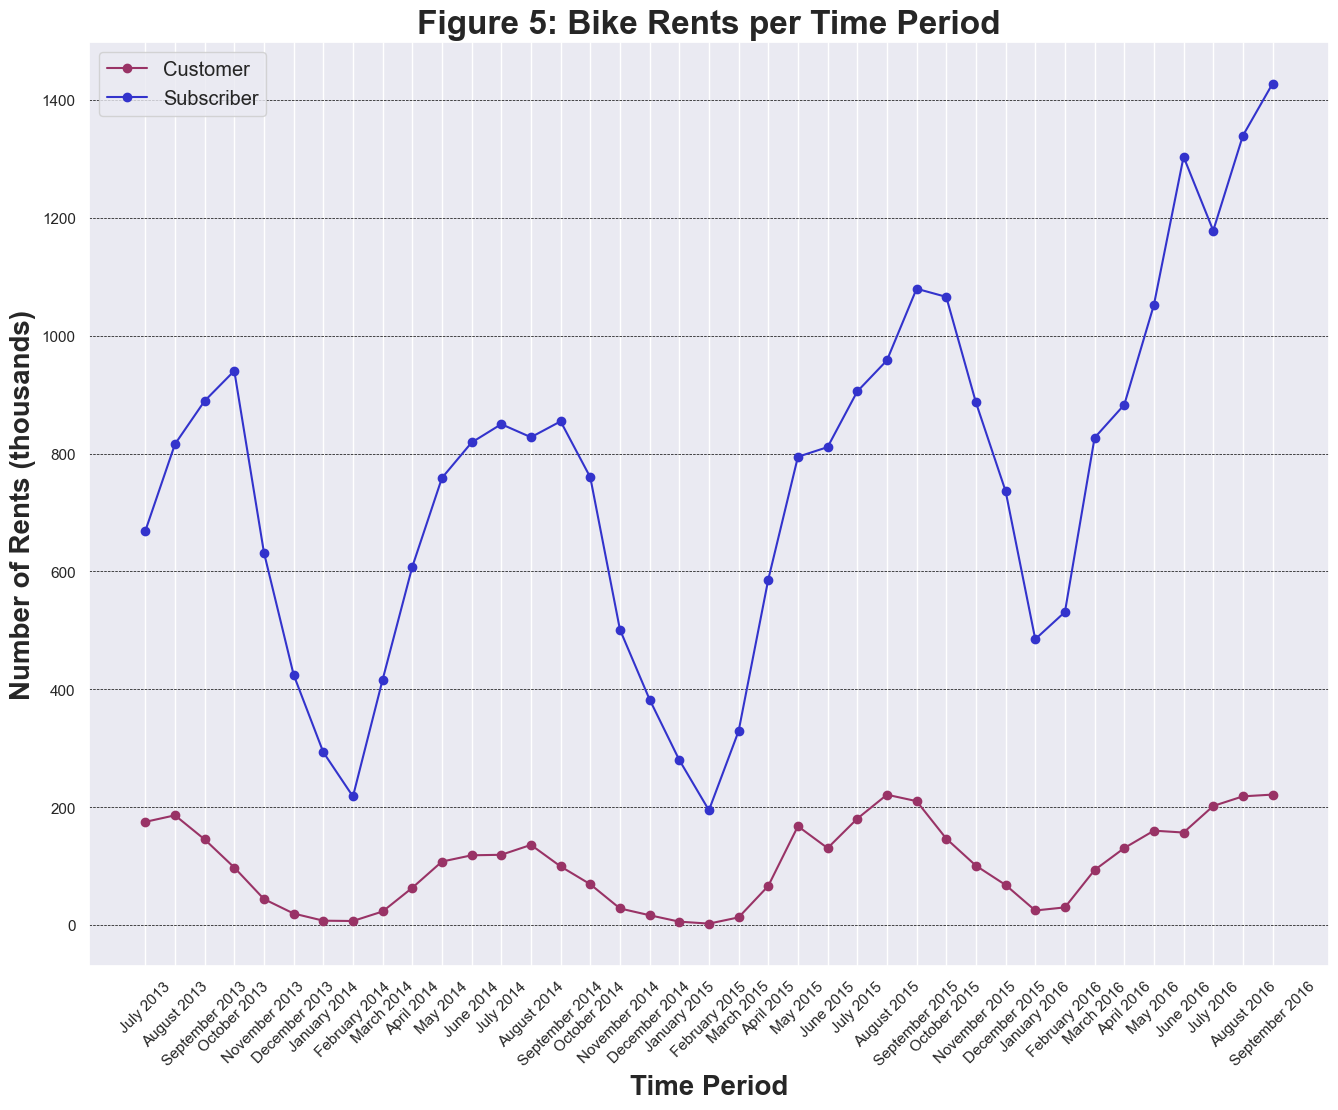

In [30]:
plt.figure(figsize = (16,12))

plt.plot(time_periods_sorted, np.array(trip_number5_1)/1000, "-o", color='#993366')

plt.plot(time_periods_sorted, np.array(trip_number5_2)/1000, "-o", color='#3333cc')

plt.xlabel('Time Period', fontweight = 'bold', fontsize = 20)

plt.xticks(time_periods_sorted, rotation = 45)

plt.ylabel('Number of Rents (thousands)', fontweight = 'bold', fontsize = 20)

plt.title('Figure 5: Bike Rents per Time Period',
          fontsize = 24,
          fontweight = 'bold')

plt.legend(labels = ['Customer','Subscriber'], fontsize= 'large')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure5.png')

plt.show()

Every month, subscribers rented more bikes than customers.

For each client group there was a seasonality trend (mainly for the Subscribers group) since the number of rents was at its maximum during the months of summer and at the lowest during the months of winter each year.

For almost every time period, subscribers and customers rented more than 200 thousand bikes and less than 200 thousand bikes respectively.

In [31]:
average_frame_user = pd.read_csv('C:/Users/Diego/Documents/Citi Bike project/Average_lease_time_per_user_type.csv')

average_frame_user

usertype  Year  average_lease_time
0    Customer  2013           25.655535
1    Customer  2014           26.966004
2    Customer  2015           32.916423
3    Customer  2016           35.097220
4  Subscriber  2013           13.136398
5  Subscriber  2014           12.794780
6  Subscriber  2015           13.583827
7  Subscriber  2016           13.917835

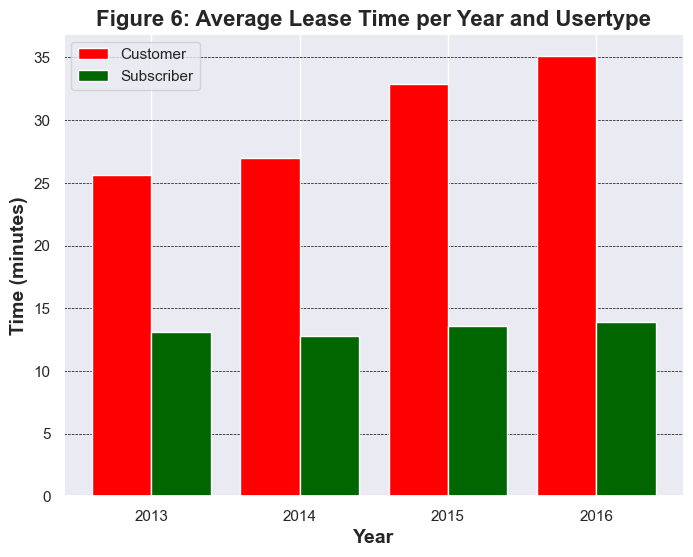

In [32]:
plt.figure(figsize = (8,6))

x = np.arange(4)

plt.bar(x-0.20, average_frame_user['average_lease_time'].iloc[0:4], width=0.4, color='#ff0000')

plt.bar(x+0.20, average_frame_user['average_lease_time'].iloc[4:8], width=0.4, color='#006600')

plt.xticks(x, year_array)

plt.xlabel("Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Time (minutes)", fontsize = 14, fontweight = 'bold')

plt.legend(["Customer",'Subscriber'])

plt.title("Figure 6: Average Lease Time per Year and Usertype", fontsize = 16, fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure6.png')

plt.show()

The average lease time was higher for customers than for subscribers.

Each year, the average lease time increased each year for customers with the greatest increase being from 2014 to 2015.

The average lease time for subscribers had no defined trend of increase or decrease and was always between 10 and 15 minutes.

In [33]:
average_frame_gender = pd.read_csv('C:/Users/Diego/Documents/Citi Bike project/Average_lease_time_per_gender.csv')

average_frame_gender

gender  Year  average_lease_time
0    female  2013           14.909772
1    female  2014           14.421530
2    female  2015           15.603270
3    female  2016           15.727420
4      male  2013           12.586638
5      male  2014           12.317989
6      male  2015           12.968273
7      male  2016           13.288590
8   unknown  2013           25.649668
9   unknown  2014           26.942797
10  unknown  2015           32.770775
11  unknown  2016           34.186684

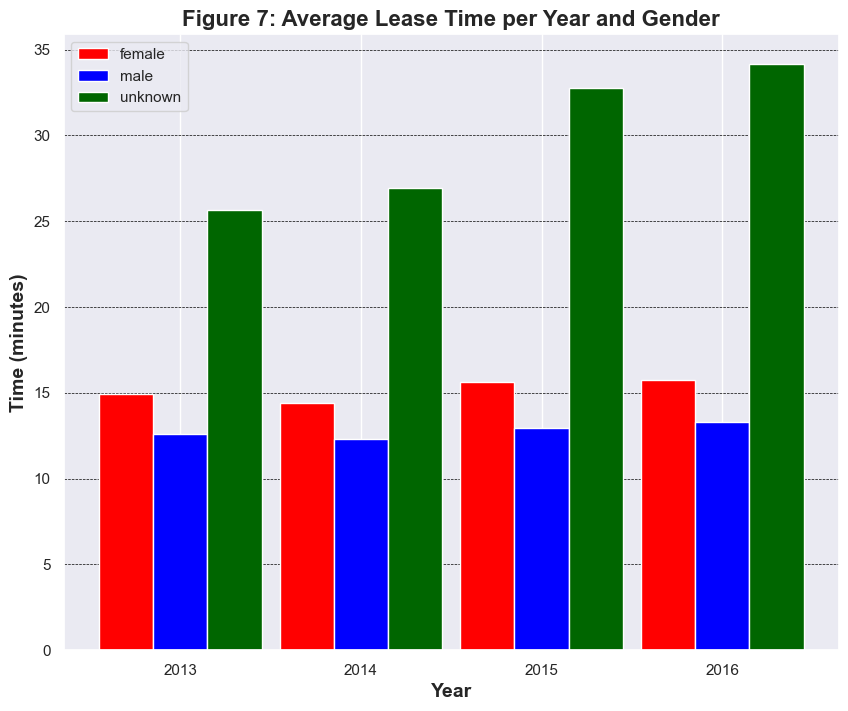

In [34]:
plt.figure(figsize = (10,8))

x = np.arange(4)

plt.bar(x-0.30, average_frame_gender['average_lease_time'].iloc[0:4], width=0.3, color='#ff0000')

plt.bar(x, average_frame_gender['average_lease_time'].iloc[4:8], width=0.3, color='#0000ff')

plt.bar(x+0.30, average_frame_gender['average_lease_time'].iloc[8:12], width=0.3, color='#006600')

plt.xticks(x, year_array)

plt.xlabel("Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Time (minutes)", fontsize = 14, fontweight = 'bold')

plt.legend(gender_array)

plt.title("Figure 7: Average Lease Time per Year and Gender", fontsize = 16, fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure7.png')

plt.show()

Riders of unknown gender made trips that lasted longer, while the ones that did shorter trips were males.

The average lease time of the clients who made longer trips increased every year. The average for this group was between 25 and 35 min through the time period of interest.

The average lease times for males and females had no defined trend of increase or decrease and was always between 10 and 15 minutes.

The difference between the average for males and females was within a range of 2 to 3 in minutes.

In [35]:
longest_trip_frame = pd.read_csv('C:/Users/Diego/Documents/Citi Bike project/Longest_rent_time_per_user_type_and_gender.csv')

longest_trip_frame

usertype   gender  Year  maximum_lease_time
0     Customer   female  2013           23.666667
1     Customer   female  2014          288.083333
2     Customer   female  2016         4654.650000
3     Customer     male  2013           69.833333
4     Customer     male  2014          300.116667
5     Customer     male  2016         6996.133333
6     Customer  unknown  2013       104179.166700
7     Customer  unknown  2014        74934.333330
8     Customer  unknown  2015        86238.483330
9     Customer  unknown  2016       111792.216700
10  Subscriber   female  2013        33447.333330
11  Subscriber   female  2014        26118.333330
12  Subscriber   female  2015        97744.350000
13  Subscriber   female  2016        44959.700000
14  Subscriber     male  2013        31784.166670
15  Subscriber     male  2014        90277.333330
16  Subscriber     male  2015        62382.933330
17  Subscriber     male  2016        95012.150000
18  Subscriber  unknown  2013          111.683333
19  Subscriber  unknown  2014          947.783333
20  Subscriber  unknown  2015         3485.416667
21  Subscriber  unknown  2016        52154.850000

In [36]:
vector6_1 = longest_trip_frame['usertype'] == 'Customer'

vector6_2 = longest_trip_frame['usertype'] == 'Subscriber'

data7_1 = longest_trip_frame[vector6_1]

data7_2 = longest_trip_frame[vector6_2]

data7_1

usertype   gender  Year  maximum_lease_time
0  Customer   female  2013           23.666667
1  Customer   female  2014          288.083333
2  Customer   female  2016         4654.650000
3  Customer     male  2013           69.833333
4  Customer     male  2014          300.116667
5  Customer     male  2016         6996.133333
6  Customer  unknown  2013       104179.166700
7  Customer  unknown  2014        74934.333330
8  Customer  unknown  2015        86238.483330
9  Customer  unknown  2016       111792.216700

In [37]:
data7_2

usertype   gender  Year  maximum_lease_time
10  Subscriber   female  2013        33447.333330
11  Subscriber   female  2014        26118.333330
12  Subscriber   female  2015        97744.350000
13  Subscriber   female  2016        44959.700000
14  Subscriber     male  2013        31784.166670
15  Subscriber     male  2014        90277.333330
16  Subscriber     male  2015        62382.933330
17  Subscriber     male  2016        95012.150000
18  Subscriber  unknown  2013          111.683333
19  Subscriber  unknown  2014          947.783333
20  Subscriber  unknown  2015         3485.416667
21  Subscriber  unknown  2016        52154.850000

In [38]:
trip_time1 = []

for j in year_array:
    l1 = []
    for i in (range(0,data7_1.shape[0])):
        if data7_1['Year'].iloc[i] == j:
            l1.append(data7_1['maximum_lease_time'].iloc[i])
    trip_time1.append(max(l1))
    
trip_time1

[104179.1667, 74934.33333, 86238.48333, 111792.2167]

In [39]:
trip_time2 = []

for j in year_array:
    l1 = []
    for i in (range(0,data7_2.shape[0])):
        if data7_2['Year'].iloc[i] == j:
            l1.append(data7_2['maximum_lease_time'].iloc[i])
    trip_time2.append(max(l1))
    
trip_time2

[33447.33333, 90277.33333, 97744.35, 95012.15]

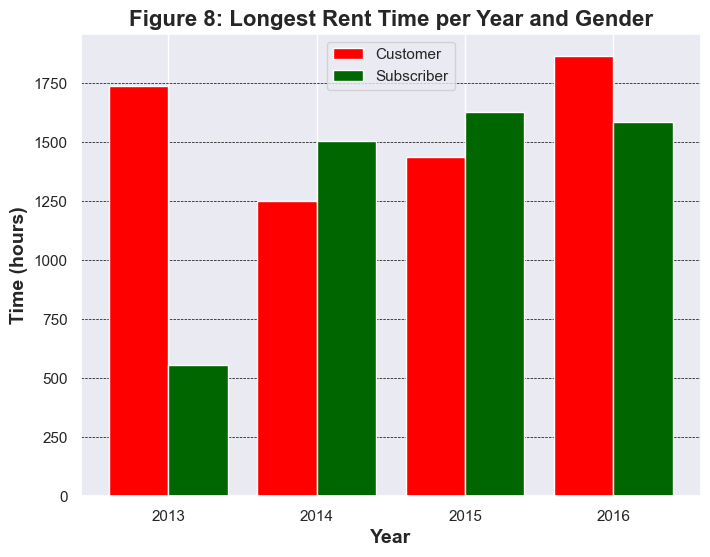

In [40]:
plt.figure(figsize = (8,6))

x = np.arange(4)

plt.bar(x-0.20, np.array(trip_time1)/(60), width=0.4, color='#ff0000')

plt.bar(x+0.20, np.array(trip_time2)/(60), width=0.4, color='#006600')

plt.xticks(x, year_array)

plt.xlabel("Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Time (hours)", fontsize = 14, fontweight = 'bold')

plt.legend(["Customer",'Subscriber'])

plt.title("Figure 8: Longest Rent Time per Year and Gender", fontsize = 16, fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure8.png')

plt.show()

In 2013 and 2016, a customer was the rider who rented the bike for the longest time while in 2014 and 2015 the opposite happened.

There was no trend of increase or decrease for the time of the longest rent each year for each group.

The year with the greatest difference in the longest rents between groups was 2013.

In [41]:
trip_group1 = []

for j in np.unique(data7_1['gender']):
    l1 = []
    for i in (range(0,data7_1.shape[0])):
        if data7_1['gender'].iloc[i] == j:
            l1.append(data7_1['maximum_lease_time'].iloc[i]/(60))
    trip_group1.append(l1)

trip_group1[0].insert(2,0)
trip_group1[1].insert(2,0)

trip_group1

[[0.39444444450000005, 4.801388888333333, 0, 77.5775],
 [1.1638888888333334, 5.001944445, 0, 116.60222221666666],
 [1736.319445, 1248.9055555, 1437.3080555000001, 1863.2036116666668]]

In [42]:
trip_group2 = []

for j in np.unique(data7_2['gender']):
    l1 = []
    for i in (range(0,data7_2.shape[0])):
        if data7_2['gender'].iloc[i] == j:
            l1.append(data7_2['maximum_lease_time'].iloc[i]/(60))
    trip_group2.append(l1)
    
trip_group2

[[557.4555555000001, 435.3055555, 1629.0725, 749.3283333333333],
 [529.7361111666667, 1504.6222221666665, 1039.7155555, 1583.5358333333331],
 [1.8613888883333334, 15.796388888333333, 58.090277783333335, 869.2475]]

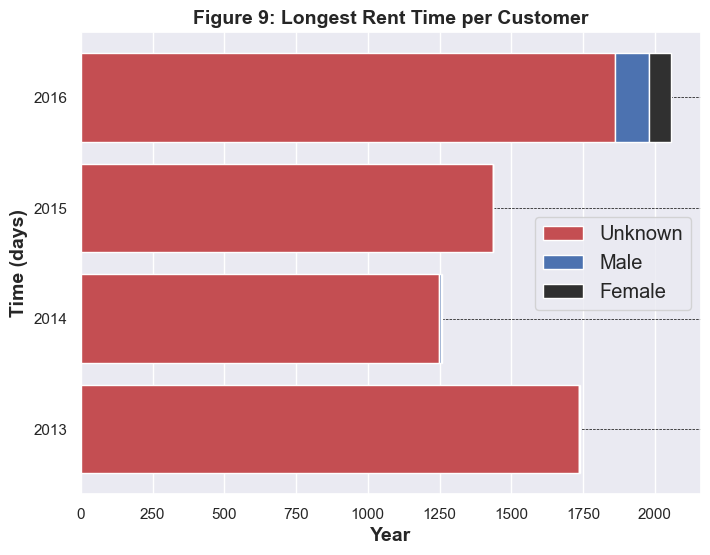

In [43]:
plt.figure(figsize = (8,6))

plt.barh(['2013','2014','2015','2016'], np.array(trip_group1[2]), color='r')

plt.barh(['2013','2014','2015','2016'], np.array(trip_group1[1]), left=np.array(trip_group1[2]), color='b')

plt.barh(['2013','2014','2015','2016'], np.array(trip_group1[0]), left=np.array(trip_group1[2])+np.array(trip_group1[1]), color='#303030')

plt.title('Figure 9: Longest Rent Time per Customer', fontsize = 14, weight = 'bold')

plt.xlabel('Year', weight = 'bold', fontsize = 14)

plt.ylabel('Time (days)', weight = 'bold', fontsize = 14)

plt.legend(labels = ['Unknown','Male','Female'], fontsize= 'large', loc = 'center right')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.show()

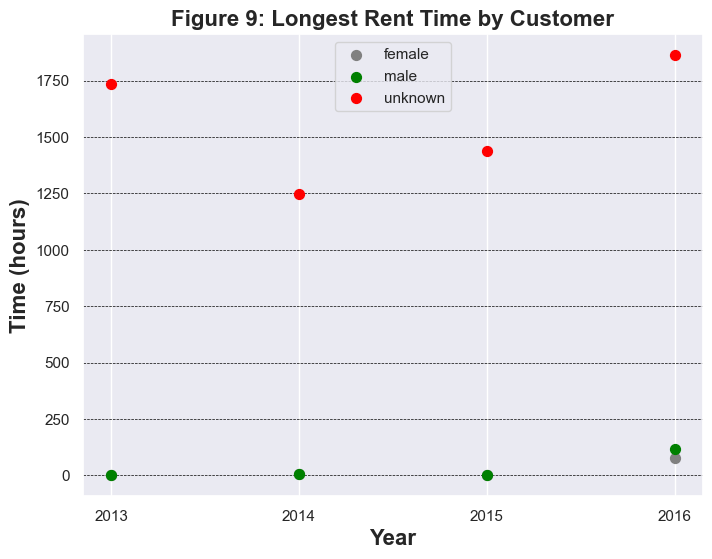

In [44]:
plt.figure(figsize = (8,6))

plt.scatter(['2013','2014','2015','2016'], np.array(trip_group1[0]), c ="grey",
            linewidths = 1,
            marker ="o",
            s = 50)
 
plt.scatter(['2013','2014','2015','2016'], np.array(trip_group1[1]), c ="green",
            linewidths = 1,
            marker ="o",
            s = 50)

plt.scatter(['2013','2014','2015','2016'], np.array(trip_group1[2]), c ="red",
            linewidths = 1,
            marker ="o",
            s = 50)
 
plt.xlabel("Year", fontsize = 16, fontweight = 'bold')

plt.ylabel("Time (hours)", fontsize = 16, fontweight = 'bold')

plt.title('Figure 9: Longest Rent Time by Customer',
          fontsize = 16,
          fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.legend(gender_array, loc= 'upper center')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure9.png')

plt.show()

Customers of unknown gender made the longest lease each year.

For Customers that were either female or males, their longest bike rent each year was close.

The year where a customer rented a bike the longest was in 2016.

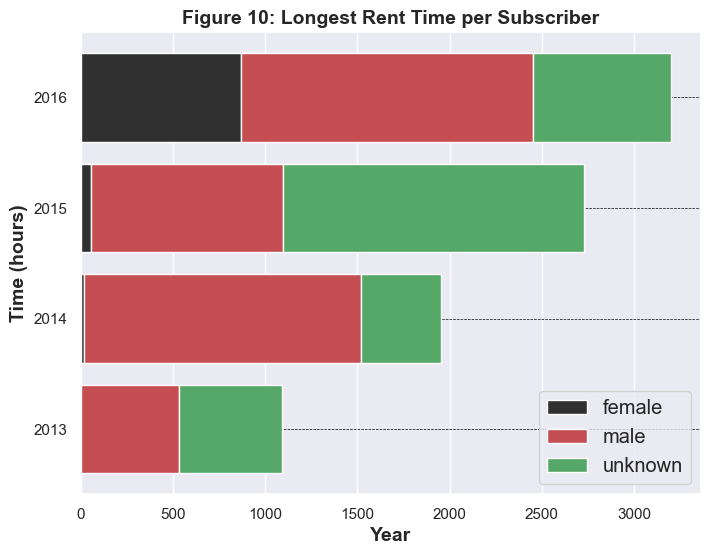

In [45]:
plt.figure(figsize = (8,6))

plt.barh(['2013','2014','2015','2016'], np.array(trip_group2[2]), color='#303030')

plt.barh(['2013','2014','2015','2016'], np.array(trip_group2[1]), left=np.array(trip_group2[2]), color='r')

plt.barh(['2013','2014','2015','2016'], np.array(trip_group2[0]), left=np.array(trip_group2[2])+np.array(trip_group2[1]), color='g')

plt.title('Figure 10: Longest Rent Time per Subscriber', fontsize = 14, weight = 'bold')

plt.xlabel('Year', weight = 'bold', fontsize = 14)

plt.ylabel('Time (hours)', weight = 'bold', fontsize = 14)

plt.legend(gender_array, fontsize= 'large', loc = 'lower right')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.show()

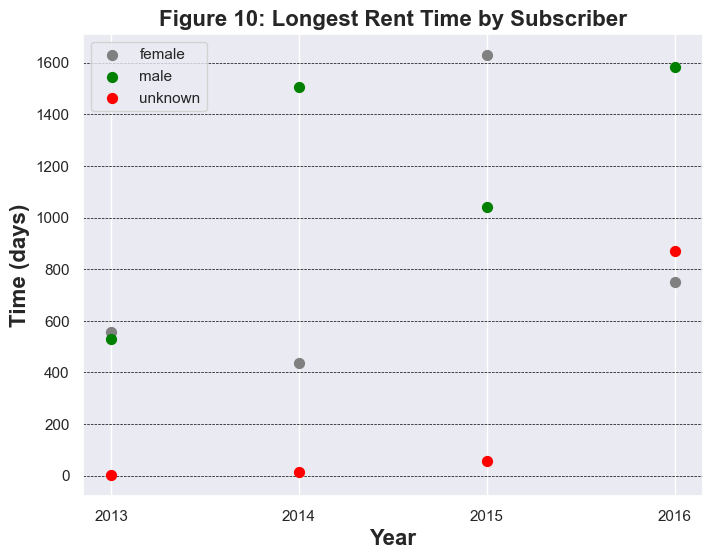

In [46]:
plt.figure(figsize = (8,6))

plt.scatter(['2013','2014','2015','2016'], np.array(trip_group2[0]), c ="grey",
            linewidths = 1,
            marker ="o",
            s = 50)
 
plt.scatter(['2013','2014','2015','2016'], np.array(trip_group2[1]), c ="green",
            linewidths = 1,
            marker ="o",
            s = 50)

plt.scatter(['2013','2014','2015','2016'], np.array(trip_group2[2]), c ="red",
            linewidths = 1,
            marker ="o",
            s = 50)
 
plt.xlabel("Year", fontsize = 16, fontweight = 'bold')

plt.ylabel("Time (days)", fontsize = 16, fontweight = 'bold')

plt.title('Figure 10: Longest Rent Time by Subscriber',
          fontsize = 16,
          fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.legend(gender_array)

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure10.png')

plt.show()

Through most of the time period of interest, (except in 2016), subscribers of unknown gender had the shortest leases in this group of clients. However, the time of the longest lease made by this group increased every year.

Male subscribers rented a bike the longest in 2014 and 2016 while females did this in 2013 and 2015.

The year where a subscriber rented a bike the longest was in 2015.

In [47]:
long_trip_number_frame = pd.read_csv('C:/Users/Diego/Documents/Citi Bike project/Long_rents_per_user_type_and_gender.csv')

long_trip_number_frame['Time Period'] = long_trip_number_frame['Month'] + ' ' + long_trip_number_frame['Year'].astype(str)

long_trip_number_frame['group'] = long_trip_number_frame['usertype'] + ' : ' + long_trip_number_frame['gender']

long_trip_number_frame

usertype   gender  Year      Month  total_number_of_rents  \
0      Customer   female  2014       July                      1   
1      Customer   female  2014     August                      2   
2      Customer   female  2016       July                     39   
3      Customer   female  2016     August                    165   
4      Customer   female  2016  September                    307   
..          ...      ...   ...        ...                    ...   
152  Subscriber  unknown  2016        May                    446   
153  Subscriber  unknown  2016       June                    818   
154  Subscriber  unknown  2016       July                     70   
155  Subscriber  unknown  2016     August                     94   
156  Subscriber  unknown  2016  September                    160   

        Time Period                 group  
0         July 2014     Customer : female  
1       August 2014     Customer : female  
2         July 2016     Customer : female  
3       August 2016     Customer : female  
4    September 2016     Customer : female  
..              ...                   ...  
152        May 2016  Subscriber : unknown  
153       June 2016  Subscriber : unknown  
154       July 2016  Subscriber : unknown  
155     August 2016  Subscriber : unknown  
156  September 2016  Subscriber : unknown  

[157 rows x 7 columns]

In [48]:
period_array_2 = np.unique(long_trip_number_frame['Time Period'])

period_array_2

array(['April 2014', 'April 2015', 'April 2016', 'August 2013',
       'August 2014', 'August 2015', 'August 2016', 'December 2013',
       'December 2014', 'December 2015', 'February 2014', 'February 2015',
       'February 2016', 'January 2014', 'January 2015', 'January 2016',
       'July 2013', 'July 2014', 'July 2015', 'July 2016', 'June 2014',
       'June 2015', 'June 2016', 'March 2014', 'March 2015', 'March 2016',
       'May 2014', 'May 2015', 'May 2016', 'November 2013',
       'November 2014', 'November 2015', 'October 2013', 'October 2014',
       'October 2015', 'September 2013', 'September 2014',
       'September 2015', 'September 2016'], dtype=object)

In [49]:
long_trip_number1_1 =  trip_number_version2(long_trip_number_frame, ['usertype','Time Period','total_number_of_rents'], 'Customer', period_array_2, ordered_periods)

long_trip_number1_2 =  trip_number_version2(long_trip_number_frame, ['usertype','Time Period','total_number_of_rents'], 'Subscriber', period_array_2, ordered_periods)

In [50]:
len(long_trip_number1_1)

39

In [51]:
sum(long_trip_number1_1)

248681

In [52]:
sum(long_trip_number1_2)

124687

In [53]:
total_long_trips = sum(long_trip_number1_1) + sum(long_trip_number1_2)

total_long_trips

373368

In [54]:
total_short_trips = sum(trips_per_year) - total_long_trips

(1-total_short_trips/sum(trips_per_year))*100

1.1205852129079763

In [55]:
long_trip_number = []

for j in year_array:
    l1=[]
    for s in np.unique(long_trip_number_frame['group']):
        
        e = 0
        for i in (range(0,long_trip_number_frame.shape[0])):
            if long_trip_number_frame['Year'].iloc[i] == j and long_trip_number_frame['group'].iloc[i] == s:
                e += long_trip_number_frame['total_number_of_rents'].iloc[i]
        l1.append(e)
    long_trip_number.append(l1)
        
long_trip_number

long_trip_number_frame_2 = pd.DataFrame(data=long_trip_number,
                                        columns = np.unique(long_trip_number_frame['group']), index =year_array)

long_trip_number_frame_2

Customer : female  Customer : male  Customer : unknown  \
2013                  0                1               31587   
2014                  3                3               45637   
2015                  0                0               94520   
2016                511              614               75805   

      Subscriber : female  Subscriber : male  Subscriber : unknown  
2013                 5447              12907                     1  
2014                 9511              23839                    72  
2015                11577              25513                    61  
2016                11078              23062                  1619

<Figure size 800x600 with 0 Axes>

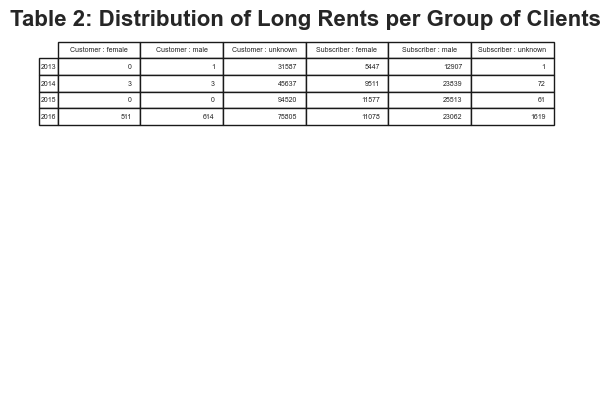

In [56]:
plt.figure(figsize = (8,6))

fig, ax = plt.subplots() 

ax.set_axis_off() 

plt.table(cellText = long_trip_number_frame_2.values, colLabels = long_trip_number_frame_2.columns,
         rowLabels = year_array, loc ='upper center').scale(1,1)

plt.title("Table 2: Distribution of Long Rents per Group of Clients", fontsize = 16, fontweight = 'bold')

ax.axis("off")

ax.axis('tight')

plt.show()

In [57]:
lt_groups = []

for i in long_trip_number_frame_2.columns:
    l1 = []
    for j in long_trip_number_frame_2[i]:
        l1.append(j)
    lt_groups.append(l1)

lt_groups

[[0, 3, 0, 511],
 [1, 3, 0, 614],
 [31587, 45637, 94520, 75805],
 [5447, 9511, 11577, 11078],
 [12907, 23839, 25513, 23062],
 [1, 72, 61, 1619]]

In [58]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['','Customer: Female','Customer: Male','Customer: Unknown','Subscriber: Female', 'Subscriber: Male', 'Subscriber: Unknown']),
    cells=dict(values=[year_array,lt_groups[0],lt_groups[1],lt_groups[2],lt_groups[3],lt_groups[4],lt_groups[5]]))])

fig.update_layout(title_text='Table 2: Distribution of Long Rents per Group of Clients', title_x=0.5, title_font_family="Arial Black",
    title_font_color="black")

fig.show()

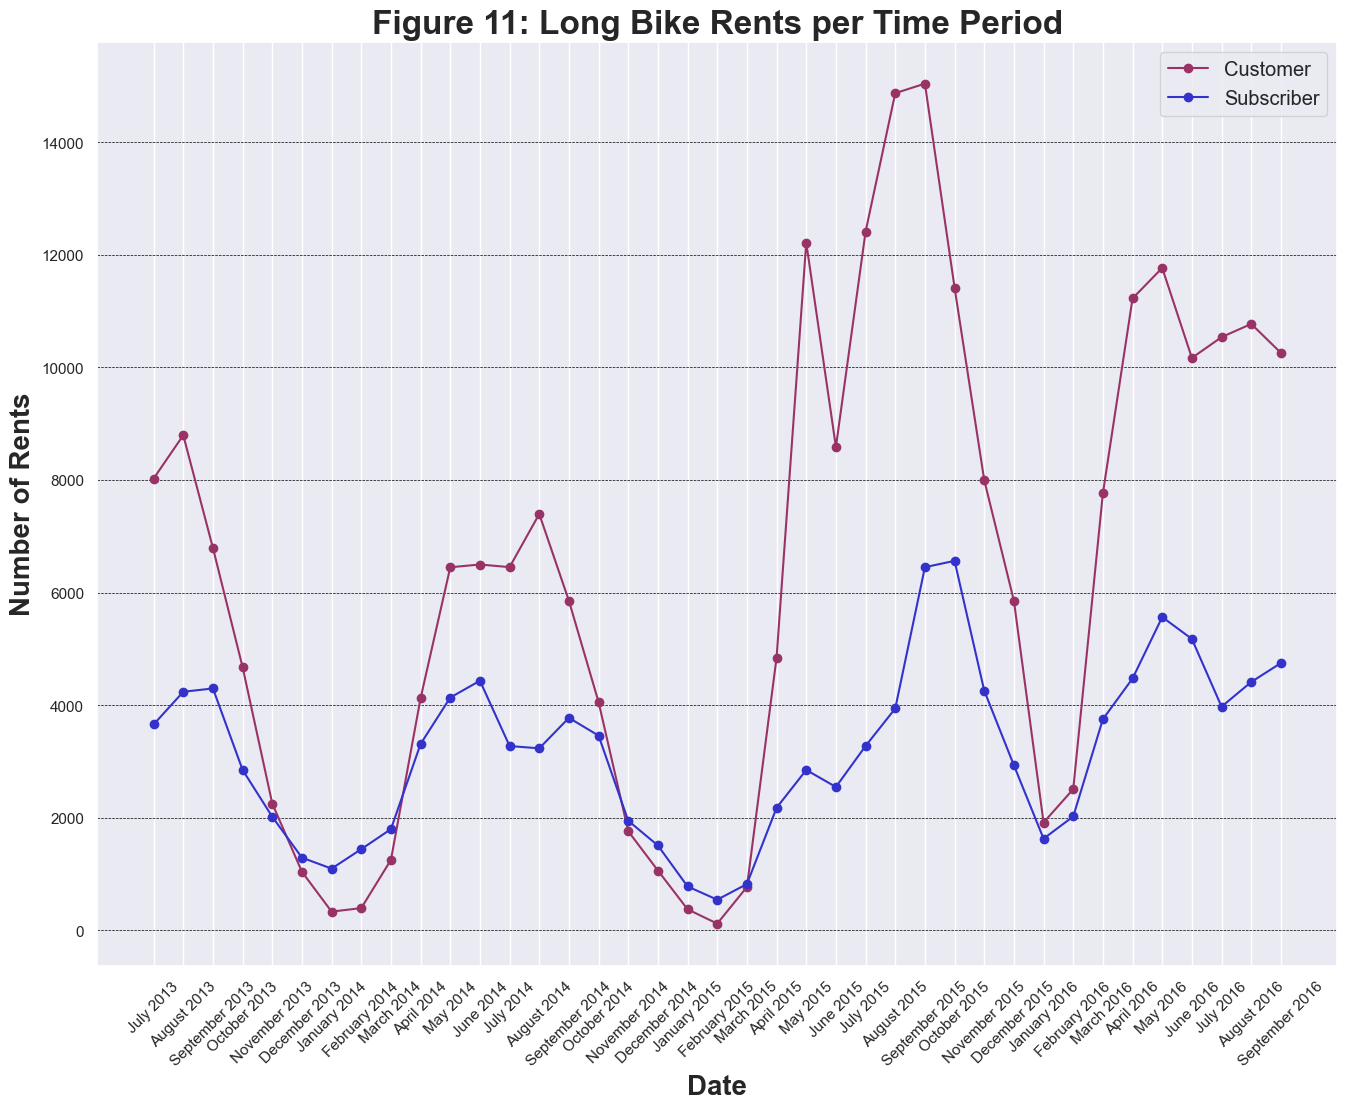

In [80]:
plt.figure(figsize = (16,12))

plt.plot(time_periods_sorted, long_trip_number1_1, "-o", color='#993366')

plt.plot(time_periods_sorted, long_trip_number1_2, "-o", color='#3333cc')

plt.xlabel('Date', fontweight = 'bold', fontsize = 20)

plt.xticks(time_periods_sorted, rotation = 45)

plt.ylabel('Number of Rents', fontweight = 'bold', fontsize = 20)

plt.title('Figure 11: Long Bike Rents per Time Period',
          fontsize = 24,
          fontweight = 'bold')

plt.legend(labels = ['Customer','Subscriber'], fontsize= 'large')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure11.png')

plt.show()

The greatest number of long rents was done by customers.

The year that had the greatest number of long rents was 2015.

For each year, the customer group had a greater number of long leases than the subscriber group during the months of summer, especially in 2015.

There was a seasonal trend of increase for the both groups with the greatest and lowest amounts of long rents during the months summer and winter respectively.

Customers of unknown gender were the ones who made more long leases through each year while for the group of Subscribers, males were the ones that did long trips mostly each year.

In [60]:
total_trip_number = []

for j in year_array:
    l1=[]
    for s in np.unique(trips_frame['group']):
        
        e = 0
        for i in (range(0,trips_frame.shape[0])):
            if trips_frame['Year'].iloc[i] == j and trips_frame['group'].iloc[i] == s:
                e += trips_frame['total_number_of_trips'].iloc[i]
        l1.append(e)
    total_trip_number.append(l1)
        
total_trip_number

[[1, 42, 666897, 1034630, 3335349, 266],
 [22, 50, 793423, 1650252, 5635912, 1557],
 [0, 0, 1311331, 2006962, 6608929, 10747],
 [13125, 19968, 1203172, 2173792, 6749064, 103528]]

In [61]:
long_trip_number

[[0, 1, 31587, 5447, 12907, 1],
 [3, 3, 45637, 9511, 23839, 72],
 [0, 0, 94520, 11577, 25513, 61],
 [511, 614, 75805, 11078, 23062, 1619]]

In [62]:
short_trip_number = np.array(total_trip_number) - np.array(long_trip_number)

short_trip_number

array([[      1,      41,  635310, 1029183, 3322442,     265],
       [     19,      47,  747786, 1640741, 5612073,    1485],
       [      0,       0, 1216811, 1995385, 6583416,   10686],
       [  12614,   19354, 1127367, 2162714, 6726002,  101909]],
      dtype=int64)

In [63]:
short_trip_number_frame = pd.DataFrame(data=short_trip_number,
                                        columns = np.unique(trips_frame['group']), index =year_array)

short_trip_number_frame

Customer : female  Customer : male  Customer : unknown  \
2013                  1               41              635310   
2014                 19               47              747786   
2015                  0                0             1216811   
2016              12614            19354             1127367   

      Subscriber : female  Subscriber : male  Subscriber : unknown  
2013              1029183            3322442                   265  
2014              1640741            5612073                  1485  
2015              1995385            6583416                 10686  
2016              2162714            6726002                101909

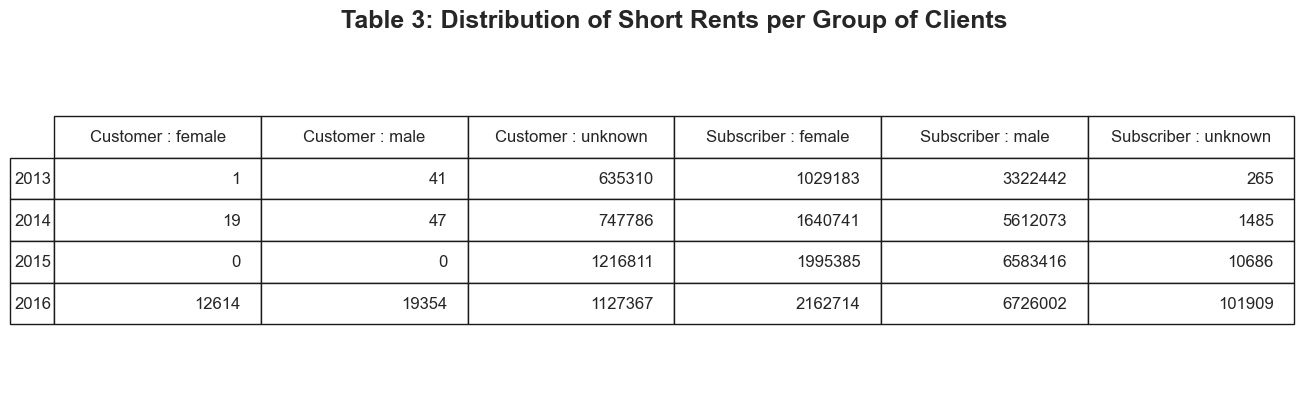

In [64]:
fig, ax = plt.subplots()

ax.set_axis_off() 

plt.table(cellText = short_trip_number_frame.values, colLabels = short_trip_number_frame.columns,
         rowLabels = year_array, loc ='center').scale(2.5, 2.5)

plt.title("Table 3: Distribution of Short Rents per Group of Clients", fontsize = 18, fontweight = 'bold')

ax.axis("off")

ax.axis('tight')

plt.show()

In [65]:
st_groups = []

for i in short_trip_number_frame.columns:
    l1 = []
    for j in short_trip_number_frame[i]:
        l1.append(j)
    st_groups.append(l1)

st_groups

[[1, 19, 0, 12614],
 [41, 47, 0, 19354],
 [635310, 747786, 1216811, 1127367],
 [1029183, 1640741, 1995385, 2162714],
 [3322442, 5612073, 6583416, 6726002],
 [265, 1485, 10686, 101909]]

In [66]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['','Customer: Female','Customer: Male','Customer: Unknown','Subscriber: Female', 'Subscriber: Male', 'Subscriber: Unknown']),
    cells=dict(values=[year_array,st_groups[0],st_groups[1],st_groups[2],st_groups[3],st_groups[4],st_groups[5]]))])

fig.update_layout(title_text='Table 3: Distribution of Short Rents per Group of Clients', title_x=0.5, title_font_family="Arial Black",
    title_font_color="black")

fig.show()

In [67]:
short_trips_frame_customer_type = pd.read_csv('C:/Users/Diego/Documents/Citi Bike project/Short_rents_average_time_per_user_type.csv')

short_trips_frame_customer_type

usertype  Year  average_rent_time
0    Customer  2013          19.830877
1    Customer  2014          20.755590
2    Customer  2015          20.812718
3    Customer  2016          21.497326
4  Subscriber  2013          12.311556
5  Subscriber  2014          11.929187
6  Subscriber  2015          11.892599
7  Subscriber  2016          12.317234

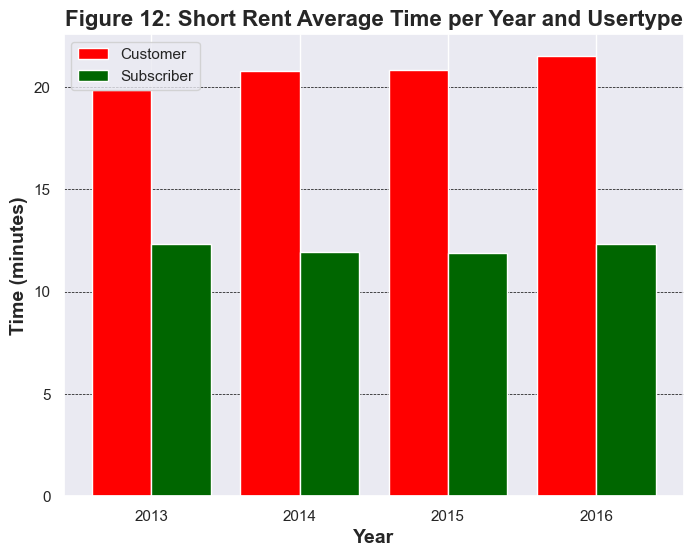

In [68]:
plt.figure(figsize = (8,6))

x = np.arange(4)

plt.bar(x-0.20, short_trips_frame_customer_type['average_rent_time'].iloc[0:4], width=0.4, color='#ff0000')

plt.bar(x+0.20, short_trips_frame_customer_type['average_rent_time'].iloc[4:8], width=0.4, color='#006600')

plt.xticks(x, year_array)

plt.xlabel("Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Time (minutes)", fontsize = 14, fontweight = 'bold')

plt.legend(["Customer",'Subscriber'])

plt.title('Figure 12: Short Rent Average Time per Year and Usertype',
          fontsize = 16,
          fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure12.png')

plt.show()

The average of each group was reduced each year, especially for the Customer group.

The average rent time of still was lower for subscribers than for customers but the difference was lower than before.

The average rent time of subscribers was between 11 and 13 minutes each year while for customers was between 19 and 22 minutes.

In [69]:
short_trips_frame_gender = pd.read_csv('C:/Users/Diego/Documents/Citi Bike project/Short_rents_average_time_per_gender.csv')

short_trips_frame_gender

gender  Year  average_rent_time
0    female  2013          13.842976
1    female  2014          13.403611
2    female  2015          13.290026
3    female  2016          13.649902
4      male  2013          11.837474
5      male  2014          11.498837
6      male  2015          11.467118
7      male  2016          11.872135
8   unknown  2013          19.826696
9   unknown  2014          20.733549
10  unknown  2015          20.745418
11  unknown  2016          21.059077

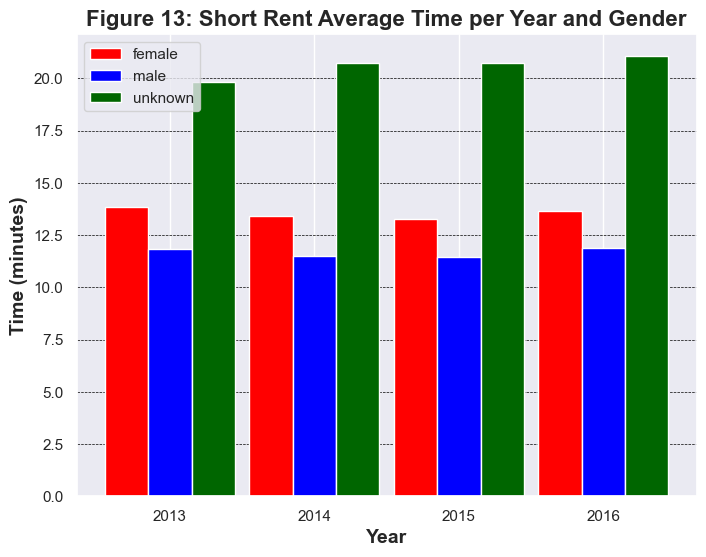

In [70]:
plt.figure(figsize = (8,6))

x = np.arange(4)

plt.bar(x-0.30, short_trips_frame_gender['average_rent_time'].iloc[0:4], width=0.3, color='#ff0000')

plt.bar(x, short_trips_frame_gender['average_rent_time'].iloc[4:8], width=0.3, color='#0000ff')

plt.bar(x+0.30, short_trips_frame_gender['average_rent_time'].iloc[8:12], width=0.3, color='#006600')

plt.xticks(x, year_array)

plt.xlabel("Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Time (minutes)", fontsize = 14, fontweight = 'bold')

plt.legend(gender_array, loc = 'upper left')

plt.title('Figure 13: Short Rent Average Time per Year and Gender',
          fontsize = 16,
          fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure13.png')

plt.show()

The average of each group was reduced each year, especially for riders who didn't provide their gender when renting a bike.

The average rent time of still was lower for males than for females and the average of both groups remained between 10 and 15 minutes.

The average rent time of riders of unknown gender now was between 19 and 22 minutes. Furthermore, the trend of increase in the average time each year still remained.

In [71]:
short_trips_frame = pd.read_csv('C:/Users/Diego/Documents/Citi Bike project/Short_rents_average_time_per_user_type_and_gender.csv')

short_trips_frame

usertype   gender  Year  average_rent_time
0     Customer   female  2013          23.666667
1     Customer   female  2014          14.004386
2     Customer   female  2016          21.736907
3     Customer     male  2013          15.497561
4     Customer     male  2014          17.096809
5     Customer     male  2016          20.205091
6     Customer  unknown  2013          19.831150
7     Customer  unknown  2014          20.755991
8     Customer  unknown  2015          20.812718
9     Customer  unknown  2016          21.516831
10  Subscriber   female  2013          13.842966
11  Subscriber   female  2014          13.403604
12  Subscriber   female  2015          13.290026
13  Subscriber   female  2016          13.602742
14  Subscriber     male  2013          11.837429
15  Subscriber     male  2014          11.498790
16  Subscriber     male  2015          11.467118
17  Subscriber     male  2016          11.848157
18  Subscriber  unknown  2013           9.146855
19  Subscriber  unknown  2014           9.432963
20  Subscriber  unknown  2015          13.082312
21  Subscriber  unknown  2016          15.995305

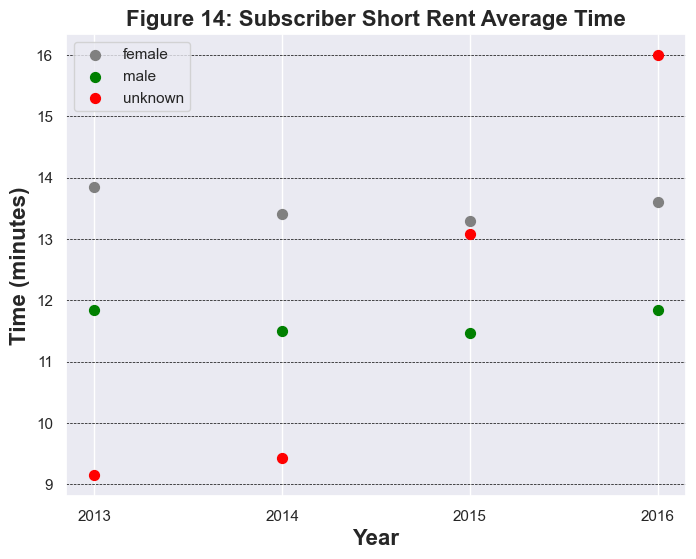

In [72]:
plt.figure(figsize = (8,6))

plt.scatter(['2013','2014','2015','2016'], short_trips_frame['average_rent_time'].iloc[10:14], c ="grey",
            linewidths = 1,
            marker ="o",
            s = 50)
 
plt.scatter(['2013','2014','2015','2016'], short_trips_frame['average_rent_time'].iloc[14:18], c ="green",
            linewidths = 1,
            marker ="o",
            s = 50)

plt.scatter(['2013','2014','2015','2016'], short_trips_frame['average_rent_time'].iloc[18:22], c ="red",
            linewidths = 1,
            marker ="o",
            s = 50)
 
plt.xlabel("Year", fontsize = 16, fontweight = 'bold')

plt.ylabel("Time (minutes)", fontsize = 16, fontweight = 'bold')

plt.title('Figure 14: Subscriber Short Rent Average Time',
          fontsize = 16,
          fontweight = 'bold')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.legend(gender_array)

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure14.png')

plt.show()

The average of subscribers of unknown gender increased every year while the averages of females and males had no trend.

Through most of the years except in 2016, female subscribers had a higher average than the other 2 groups.

The average of male subscribers was always lower than the one of female subscribers.

In [73]:
vector8_1 = short_trips_frame['usertype'] == 'Customer'

data9_1 = short_trips_frame[vector8_1]

data9_1

usertype   gender  Year  average_rent_time
0  Customer   female  2013          23.666667
1  Customer   female  2014          14.004386
2  Customer   female  2016          21.736907
3  Customer     male  2013          15.497561
4  Customer     male  2014          17.096809
5  Customer     male  2016          20.205091
6  Customer  unknown  2013          19.831150
7  Customer  unknown  2014          20.755991
8  Customer  unknown  2015          20.812718
9  Customer  unknown  2016          21.516831

In [74]:
short_customer1 = []

for j in np.unique(data9_1['gender']):
    l1 = []
    for i in (range(0,data9_1.shape[0])):
        if data9_1['gender'].iloc[i] == j:
            l1.append(data9_1['average_rent_time'].iloc[i])
    short_customer1.append(l1)
    
short_customer1

short_customer1[0].insert(2,0)
short_customer1[1].insert(2,0)

short_customer1

[[23.66666667, 14.00438596, 0, 21.73690665],
 [15.49756098, 17.09680851, 0, 20.20509111],
 [19.83115035, 20.75599132, 20.81271787, 21.51683089]]

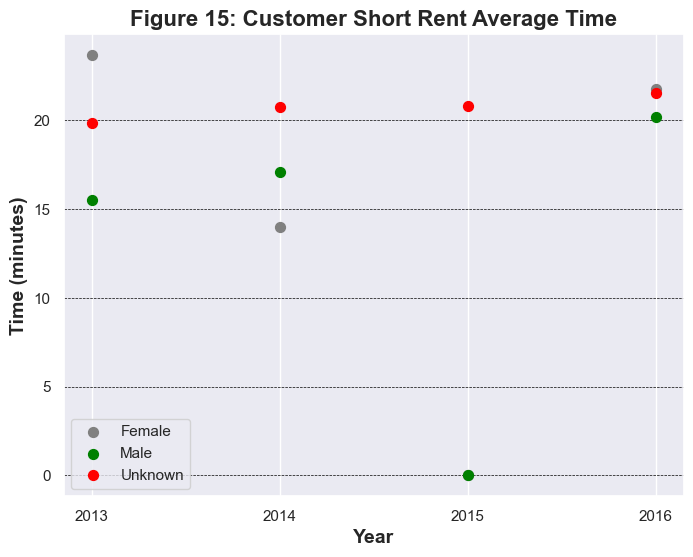

In [75]:
plt.figure(figsize = (8,6))

plt.scatter(['2013','2014','2015','2016'], short_customer1[0], c ="grey",
            linewidths = 1,
            marker ="o",
            s = 50)
 
plt.scatter(['2013','2014','2015','2016'], short_customer1[1], c ="green",
            linewidths = 1,
            marker ="o",
            s = 50)

plt.scatter(['2013','2014','2015','2016'], short_customer1[2], c ="red",
            linewidths = 1,
            marker ="o",
            s = 50)
 
plt.xlabel("Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Time (minutes)", fontsize = 14, fontweight = 'bold')

plt.title('Figure 15: Customer Short Rent Average Time',
          fontsize = 16,
          fontweight = 'bold')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, axis='y')

plt.legend(["Female","Male", "Unknown"])

plt.savefig('C:/Users/Diego/Documents/Citi Bike project/Figure15.png')

plt.show()

The average of customers of unknown sex was between 19 and 22 minutes and it increased every year.

Through most of the year except in 2014, female customers had a higher average than male ones.

The average of 2015 was made only by customers of unknown gender.